# Assignment 5

In this assignment, you'll scrape text from [The California Aggie](https://theaggie.org/) and then analyze the text.

The Aggie is organized by category into article lists. For example, there's a [Campus News](https://theaggie.org/campus/) list, [Arts & Culture](https://theaggie.org/arts/) list, and [Sports](https://theaggie.org/sports/) list. Notice that each list has multiple pages, with a maximum of 15 articles per page.

The goal of exercises 1.1 - 1.3 is to scrape articles from the Aggie for analysis in exercise 1.4.

In [294]:
import urllib2
from bs4 import BeautifulSoup
import time
import requests
import re
import pandas as pd
from nltk.corpus import stopwords
import numpy as np
import nltk
from nltk import corpus
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.neighbors import NearestNeighbors
from matplotlib import pyplot as plt
plt.style.use('ggplot')
%matplotlib inline


In [263]:
import numpy as np
import nltk
from nltk import corpus
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.neighbors import NearestNeighbors
from matplotlib import pyplot as plt
plt.style.use('ggplot')
%matplotlib inline

__Exercise 1.1.__ Write a function that extracts all of the links to articles in an Aggie article list. The function should:

* Have a parameter `url` for the URL of the article list.

* Have a parameter `page` for the number of pages to fetch links from. The default should be `1`.

* Return a list of aricle URLs (each URL should be a string).

Test your function on 2-3 different categories to make sure it works.

Hints:

* Be polite to The Aggie and save time by setting up [requests_cache](https://pypi.python.org/pypi/requests-cache) before you write your function.

* Start by getting your function to work for just 1 page. Once that works, have your function call itself to get additional pages.

* You can use [lxml.html](http://lxml.de/lxmlhtml.html) or [BeautifulSoup](https://www.crummy.com/software/BeautifulSoup/bs4/doc/) to scrape HTML. Choose one and use it throughout the entire assignment.

In [52]:
url = "https://theaggie.org/campus/"
pages = []
g = []
soups = []
a = []
h = []
def ilovetheaggie(url,page):
    a = []
    for x in range(1,page+1):
        x = str(x)
        a.append(url + "page/"+x+"/")
    for i in a:
        time.sleep(33)
        pages.append(urllib2.urlopen(i))
    for a in pages:
        soup = BeautifulSoup(a)
        soups.append(soup.find_all('h2'))
    newsoup = sum(soups,[])
    for v in newsoup:
        g.append(v.find_all('a'))
    newa = sum(g,[])
    for f in newa:
        h.append(f.get('href'))



In [53]:
ilovetheaggie(url,2)
len(h)

30

In [54]:
h

['https://theaggie.org/2017/02/24/2017-winter-quarter-election-results/',
 'https://theaggie.org/2017/02/23/university-of-california-davis-city-council-sever-wells-fargo-contracts/',
 'https://theaggie.org/2017/02/23/academics-unite-in-peaceful-rally-against-immigration-ban/',
 'https://theaggie.org/2017/02/23/memorial-union-to-reopen-spring-quarter/',
 'https://theaggie.org/2017/02/23/asucd-president-alex-lee-vetoes-amendment-for-creation-of-judicial-council/',
 'https://theaggie.org/2017/02/22/senate-candidate-zaki-shaheen-withdraws-from-race/',
 'https://theaggie.org/2017/02/21/uc-davis-experiences-several-recent-hate-based-crimes/',
 'https://theaggie.org/2017/02/21/uc-president-selects-gary-may-as-new-uc-davis-chancellor/',
 'https://theaggie.org/2017/02/20/katehi-controversy-prompts-decline-of-uc-administrators-seeking-profitable-subsidiary-board-positions/',
 'https://theaggie.org/2017/02/20/asucd-senate-passes-resolution-submitting-comments-on-lrdp/',
 'https://theaggie.org/201

__Exercise 1.2.__ Write a function that extracts the title, text, and author of an Aggie article. The function should:

* Have a parameter `url` for the URL of the article.

* For the author, extract the "Written By" line that appears at the end of most articles. You don't have to extract the author's name from this line.

* Return a dictionary with keys "url", "title", "text", and "author". The values for these should be the article url, title, text, and author, respectively.

For example, for [this article](https://theaggie.org/2017/02/14/project-toto-aims-to-address-questions-regarding-city-finances/) your function should return something similar to this:
```
{
    'author': u'Written By: Bianca Antunez \xa0\u2014\xa0city@theaggie.org',
    'text': u'Davis residents create financial model to make city\'s financial state more transparent To increase transparency between the city\'s financial situation and the community, three residents created a model called Project Toto which aims to improve how the city communicates its finances in an easily accessible design. Jeff Miller and Matt Williams, who are members of Davis\' Finance and Budget Commission, joined together with Davis entrepreneur Bob Fung to create the model plan to bring the project to the Finance and Budget Commission in February, according to Kelly Stachowicz, assistant city manager. "City staff appreciate the efforts that have gone into this, and the interest in trying to look at the city\'s potential financial position over the long term," Stachowicz said in an email interview. "We all have a shared goal to plan for a sound fiscal future with few surprises. We believe the Project Toto effort will mesh well with our other efforts as we build the budget for the next fiscal year and beyond." Project Toto complements the city\'s effort to amplify the transparency of city decisions to community members. The aim is to increase the understanding about the city\'s financial situation and make the information more accessible and easier to understand. The project is mostly a tool for public education, but can also make predictions about potential decisions regarding the city\'s financial future. Once completed, the program will allow residents to manipulate variables to see their eventual consequences, such as tax increases or extensions and proposed developments "This really isn\'t a budget, it is a forecast to see the intervention of these decisions," Williams said in an interview with The Davis Enterprise. "What happens if we extend the sales tax? What does it do given the other numbers that are in?" Project Toto enables users, whether it be a curious Davis resident, a concerned community member or a city leader, with the ability to project city finances with differing variables. The online program consists of the 400-page city budget for the 2016-2017 fiscal year, the previous budget, staff reports and consultant analyses. All of the documents are cited and accessible to the public within Project Toto. "It\'s a model that very easily lends itself to visual representation," Mayor Robb Davis said. "You can see the impacts of decisions the council makes on the fiscal health of the city." Complementary to this program, there is also a more advanced version of the model with more in-depth analyses of the city\'s finances. However, for an easy-to-understand, simplistic overview, Project Toto should be enough to help residents comprehend Davis finances. There is still more to do on the project, but its creators are hard at work trying to finalize it before the 2017-2018 fiscal year budget. "It\'s something I have been very much supportive of," Davis said. "Transparency is not just something that I have been supportive of but something we have stated as a city council objective [ ] this fits very well with our attempt to inform the public of our challenges with our fiscal situation." ',
    'title': 'Project Toto aims to address questions regarding city finances',
    'url': 'https://theaggie.org/2017/02/14/project-toto-aims-to-address-questions-regarding-city-finances/'
}
```

Hints:

* The author line is always the last line of the last paragraph.

*   Python 2 displays some Unicode characters as `\uXXXX`. For instance, `\u201c` is a left-facing quotation mark.
    You can convert most of these to ASCII characters with the method call (on a string)
    ```
    .translate({ 0x2018:0x27, 0x2019:0x27, 0x201C:0x22, 0x201D:0x22, 0x2026:0x20 })
    ```
    If you're curious about these characters, you can look them up on [this page](http://unicode.org/cldr/utility/character.jsp), or read 
    more about [what Unicode is](http://unicode.org/standard/WhatIsUnicode.html).

In [183]:
url = "https://theaggie.org/2017/02/14/project-toto-aims-to-address-questions-regarding-city-finances/"
def textwriter(url):
    newpage = urllib2.urlopen(url)
    soup = BeautifulSoup(newpage)
    newsoup = soup.find_all('p')
    newlist = []
    text = ''
    auth = ''
    for i in newsoup:
        if(i.find('b')):
            
            break
        newlist.append(i)
    for x in newlist:
        text = text + x.get_text()
    
    for s in newsoup:
        if(s.find('strong') != None):
            auth = s.find('strong')
            print auth

    
    title = soup.find_all('title')
    fintitle = title[0].get_text()
    fintitle= re.sub(' \| The Aggie', '',fintitle)
    try:
        text = text.translate({ 0x2018:0x27, 0x2019:0x27, 0x201C:0x22, 0x201D:0x22, 0x2026:0x20 })
    except TypeError:
        text = text
    mat = text.split('Written by:')
    text = mat[0]
    try:
        author = mat[1]
    except IndexError:
        author = ''
    findic = {'author':author,'text':text,'title':fintitle,'url':url}
    return findic
        
    

In [69]:
newpage = urllib2.urlopen(citynews[0])
soup = BeautifulSoup(newpage)
newsoup = soup.find_all('p')
newlist = []
text = ''
auth = ''
for i in newsoup:
    if(i.find('b')):
        break
    newlist.append(i)
for x in newlist:
    text = text + x.get_text()
for s in newsoup:
    if(s.find('strong') != None):
        auth = s.find('strong')

__Exercise 1.3.__ Use your functions from exercises 1.1 and 1.2 to get a data frame of 60 [Campus News](https://theaggie.org/campus/) articles and a data frame of 60 [City News](https://theaggie.org/city/) articles. Add a column to each that indicates the category, then combine them into one big data frame.

The "text" column of this data frame will be your corpus for natural language processing in exercise 1.4.

In [93]:
text.split('Written by:')

[u'Local Whole Foods closes Feb. 12After five years of providing business to students and locals of Davis, the Whole Foods Market on 1st Street closed on Sunday, Feb. 12. The Davis location was one of nine Whole Foods Markets across the country to permanently close.The Whole Foods Market in Davis was located in a small shopping center along with several other eateries. The closure was part of an evaluation nationwide to determine which Whole Food\'s locations were underperforming. The local market faced competition from other supermarkets and stores in the city, such as Safeway, Trader Joe\'s and the Davis Food Co-op. Whole Foods markets itself on its organic food that does not use artificial preservatives, colors, flavors, sweeteners or hydrogenated fats. Although this is a healthy benefit, many students could not afford the price tag associated with the products."I think it affects students for the most part," said John Tuquero, a Verizon Wireless employee in the shopping center in w

In [56]:
url = "https://theaggie.org/campus/"

if(h == []):
    ilovetheaggie("https://theaggie.org/campus/",4)
h[:60]


['https://theaggie.org/2017/02/24/2017-winter-quarter-election-results/',
 'https://theaggie.org/2017/02/23/university-of-california-davis-city-council-sever-wells-fargo-contracts/',
 'https://theaggie.org/2017/02/23/academics-unite-in-peaceful-rally-against-immigration-ban/',
 'https://theaggie.org/2017/02/23/memorial-union-to-reopen-spring-quarter/',
 'https://theaggie.org/2017/02/23/asucd-president-alex-lee-vetoes-amendment-for-creation-of-judicial-council/',
 'https://theaggie.org/2017/02/22/senate-candidate-zaki-shaheen-withdraws-from-race/',
 'https://theaggie.org/2017/02/21/uc-davis-experiences-several-recent-hate-based-crimes/',
 'https://theaggie.org/2017/02/21/uc-president-selects-gary-may-as-new-uc-davis-chancellor/',
 'https://theaggie.org/2017/02/20/katehi-controversy-prompts-decline-of-uc-administrators-seeking-profitable-subsidiary-board-positions/',
 'https://theaggie.org/2017/02/20/asucd-senate-passes-resolution-submitting-comments-on-lrdp/',
 'https://theaggie.org/201

In [291]:
city = []
for x in citynews:
    city.append(textwriter(x))
campus = []
for x in campusnews:
    campus.append(textwriter(x))


<strong>Local Whole Foods closes Feb. 12</strong>
<strong>Written by: Kaelyn Tuermer-Lee — <a href="mailto:city@theaggie.org">city@theaggie.org</a></strong>
<strong>Demonstrations take place at hundreds of Planned Parenthood locations nationwide</strong>
<strong>Written By: Anya Rehon — <a href="mailto:city@theaggie.org">city@theaggie.org</a></strong>
<strong>California Redevelopment Agencies require Davis to sell Historic City Hall</strong>
<strong>Written By: Bianca Antunez — <a href="mailto:city@theaggie.org">city@theaggie.org</a></strong>
<strong>Davis residents show solidarity in wake of travel ban, vandalism</strong>
<strong>Written by: Caitlyn Sampley — city@theaggie.org</strong>
<strong>CalRecycle donates $197,851</strong>
<strong>The world is a weird place</strong>
<strong>Mayor Robb Davis reaffirms that the City of Davis will not make any policy changes</strong>
<strong>Davis resident Lauren Kirk-Coehlo arrested in connection with hate crime</strong>
<strong>Written by: Saman

In [299]:
citydf = pd.DataFrame(city)
campusdf = pd.DataFrame(campus)

In [302]:
citydf
campusdf

,author,text,title,url
0,Kaelyn Tuermer-Lee — city@theaggie.orgYou mus...,Local Whole Foods closes Feb. 12After five yea...,Davis’ Whole Foods Market shuts down,https://theaggie.org/2017/02/23/davis-whole-fo...
1,,Demonstrations take place at hundreds of Plann...,Protest against Planned Parenthood in Woodland...,https://theaggie.org/2017/02/23/protest-agains...
2,,California Redevelopment Agencies require Davi...,Davis’s Historic City Hall building to be put ...,https://theaggie.org/2017/02/23/daviss-histori...
3,Caitlyn Sampley — city@theaggie.orgYou must b...,Davis residents show solidarity in wake of tra...,Davis stands with Muslim residents,https://theaggie.org/2017/02/21/davis-stands-w...
4,,"CalRecycle donates $197,851The City of Davis w...",City of Davis awarded funds for new recycling ...,https://theaggie.org/2017/02/20/city-of-davis-...
5,,"The world is a weird placeFeb. 6""Chronic phone...",Police Logs,https://theaggie.org/2017/02/19/police-logs-12/
6,,Mayor Robb Davis reaffirms that the City of Da...,City of Davis to retain sanctuary city status,https://theaggie.org/2017/02/16/city-of-davis-...
7,Samantha Solomon — city@theaggie.orgYou must ...,Davis resident Lauren Kirk-Coehlo arrested in ...,Suspect in Davis Islamic Center vandalism arre...,https://theaggie.org/2017/02/15/suspect-in-dav...
8,,Davis residents create financial model to make...,Project Toto aims to address questions regardi...,https://theaggie.org/2017/02/14/project-toto-a...
9,,"Something smells fishyJan. 29 ""Loud music or T...",Police Logs,https://theaggie.org/2017/02/13/police-logs-11/


__Exercise 1.4.__ Use the Aggie corpus to answer the following questions. Use plots to support your analysis.

* What topics does the Aggie cover the most? Do city articles typically cover different topics than campus articles?

* What are the titles of the top 3 pairs of most similar articles? Examine each pair of articles. What words do they have in common?

* Do you think this corpus is representative of the Aggie? Why or why not? What kinds of inference can this corpus support? Explain your reasoning.

Hints:

*   The [nltk book](http://www.nltk.org/book/) and [scikit-learn documentation](http://scikit-learn.org/stable/modules/feature_extraction.html#text-feature-extraction) may be helpful here.

*   You can determine whether city articles are "near" campus articles from the similarity matrix or with k-nearest neighbors.

*   If you want, you can use the [wordcloud](http://amueller.github.io/word_cloud/) package to plot a word cloud. To install the package, run
    ```
    conda install -c https://conda.anaconda.org/amueller wordcloud
    ```
    in a terminal. Word clouds look nice and are easy to read, but are less precise than bar plots.

In [261]:
from os import path
from wordcloud import WordCloud

In [264]:
stemmer = PorterStemmer().stem
print stemmer("commercially"), stemmer("commercial")

tokenize = nltk.word_tokenize

def stem(tokens,stemmer = PorterStemmer().stem):
    return [stemmer(w.lower()) for w in tokens] 

def lemmatize(text):
    """
    Extract simple lemmas based on tokenization and stemming
    Input: string
    Output: list of strings (lemmata)
    """

commerci commerci


In [267]:
masstext = ''
qq  = []
for x in df['text']:
    masstext = masstext + x
for i in df['text']:
    qq.append(i)

In [310]:
letters_city = [re.sub("[^a-zA-Z]"," ",i) for i in citydf['text']]    
letters_campus = [re.sub("[^a-zA-Z]"," ",i) for i in campusdf['text']]    


In [316]:
letters_city = [i.lower() for i in letters_city]
letters_campus = [i.lower() for i in letters_campus]
letters_city = [x.encode('UTF8') for x in letters_city]
letters_campus = [x.encode('UTF8') for x in letters_campus]

In [363]:
cityletters = []
campusletters = []
for i in letters_city:
     cityletters.append(i.split())
cityletters
for i in letters_campus:
     campusletters.append(i.split())



In [364]:
import itertools

merged = list(itertools.chain(*cityletters))
campmerged = list(itertools.chain(*campusletters))


words = [w for w in merged if not w in stopwords.words("english")]


campwords = [w for w in campmerged if not w in stopwords.words("english")]


In [366]:
cityword = " ".join(words)
campword = " ".join(campwords)

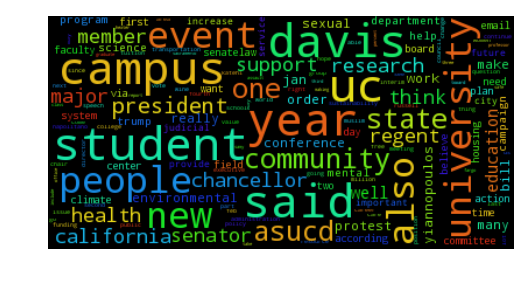

In [369]:
wordcloudcamp = WordCloud(max_font_size=40).generate(campword)

plt.figure()
plt.imshow(wordcloudcamp)
plt.axis("off")
plt.show()

# Campus
We see in the wordcount plot above the main issues surrounding campus articles include the Univeristy, UCs, students, campus, and Davis. 

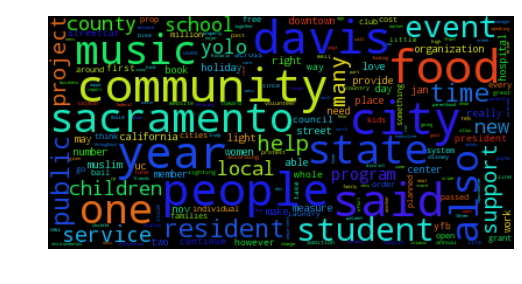

In [370]:
wordcloudcity = WordCloud(max_font_size=40).generate(cityword)

plt.figure()
plt.imshow(wordcloudcity)
plt.axis("off")
plt.show()



# City
In the City word cloud we see articles concern themselves with the community, local city of Sacramento, and food. Also of note people is state more than student where as in campus student is stated more frequently than city. 

In [377]:
fids = citydf[citydf['text'] != '']['text']
stemmer = PorterStemmer().stem
print stemmer("commercially"), stemmer("commercial")

tokenize = nltk.word_tokenize

def stem(tokens,stemmer = PorterStemmer().stem):
    return [stemmer(w.lower()) for w in tokens] 

def lemmatize(text):
    """
    Extract simple lemmas based on tokenization and stemming
    Input: string
    Output: list of strings (lemmata)
    """
    return stem(tokenize(text))

commerci commerci


In [388]:

for fid in fids:
    t = fid
    s = set(lemmatize(t))
    try:
        toks = toks | s
    except NameError:
        toks = s
    for tok in s:
        try:
            textd[tok].append(fid)
        except KeyError:
            textd[tok] = [fid]

docids = {} #dictionary of the document id to an integer id for the document
N = len(fids)
for i in fids.index:
    docids[fids[i]] = i
    
tokids = {} #dictionary of lemma to integer id for the lemma
tok_list = list(toks)
m = len(tok_list)
for j in xrange(m):
    tokids[tok_list[j]] = j

In [389]:
numd = {key:len(set(val)) for key,val in textd.items()}

In [391]:
logN = np.log(len(fids))

In [423]:
idf_smooth = {key:logN - np.log(1 + val) for key, val in numd.items() if val > 1}

In [ ]:
reu_label = [1*('Davis' in fid) for fid in fids]

(array([  16.,    5.,   10.,    9.,   18.,   11.,   16.,   19.,   26.,
          51.,   30.,   35.,  109.,   78.,   87.,    0.,  137.,  234.,
           0.,  531.]),
 array([-0.02150621,  0.11607056,  0.25364733,  0.39122409,  0.52880086,
         0.66637762,  0.80395439,  0.94153115,  1.07910792,  1.21668469,
         1.35426145,  1.49183822,  1.62941498,  1.76699175,  1.90456851,
         2.04214528,  2.17972205,  2.31729881,  2.45487558,  2.59245234,
         2.73002911]),
 <a list of 20 Patch objects>)

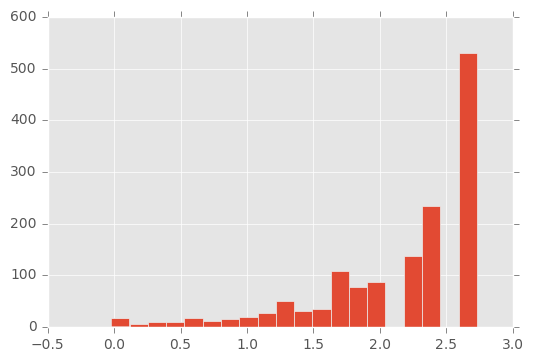

In [401]:
plt.hist(idf_smooth.values(),bins=20)

In [396]:
vectorizer = TfidfVectorizer(tokenizer=lemmatize,stop_words="english",smooth_idf=True,norm=None)

tfs = vectorizer.fit_transform(fids)

In [397]:
sim = tfs.dot(tfs.T)

In [439]:
sim

<46x46 sparse matrix of type '<type 'numpy.float64'>'
	with 2116 stored elements in Compressed Sparse Row format>

In [441]:
docids[tname]

25

In [458]:
toks = tok_list[16]

In [459]:
testdocs = [docids[tname] for tname in textd[toks]]

In [431]:
docids

{u'35th annual tree lighting ceremony kicks off with Davis Food Co-op sponsored eventCandles lit the streets of Davis on Dec. 1 as children of all ages join in on the annual Children\'s Candlelight Parade. The event has been a staple in Davis for 35 years. "The Children\'s Candlelight parade is one of Davis\' most time-honored holiday traditions," said Lucas Frerichs, a Davis city councilmember. "It\'s such a great experience to see the community gather at the Davis Food Co-op and make their way to the E Street Plaza for the holiday tree lighting and other festive holiday activities."The parade and tree lighting ceremonies are two of Davis\' oldest community traditions, organized by many members of the City of Davis and produced by Bob Bowen, Davis city manager."The annual Children\'s Candlelight Parade has been sponsored by the Davis Food Co-op for over two decades," Bowen said in a press release. Children who wish to participate in the parade received free candles with safety drip cu

In [506]:

trynamax = np.zeros(shape=(46,46))
for i in range(46):
    for j in range(46):
        testdocs = [i,j]
        trynamax[i,j] = sim[tuple(testdocs)]


In [477]:
trynamax.argmax()

2021

In [511]:
maxi = 0
max2 = 0
max3 = 0 
row = 0
col = 0
row2 = 0
row3 = 0
col2 = 0
col3 = 0
for i in range(46):
    for j in range(46):
        if(i == j):
            trynamax[i,j] = 0
        if(trynamax[i,j] > maxi):
            maxi = trynamax[i,j]
            row3 = row2
            col3 = col2
            row2 = row
            col2 = col
            row = i
            col = j
        else if()
            
        

38143.9195074292

In [409]:
sim.mean()

1777.6628352898949

In [420]:
k_max = 20
nbrs = NearestNeighbors(n_neighbors=k_max).fit(tfs)
err_list = []

for k in xrange(1,k_max+1,2):
    neighmat = nbrs.kneighbors_graph(n_neighbors=k)
    pred_lab = (neighmat.dot(reu_label) > k/2.)*1 #Why should this be knn classification?
    err =  np.mean(pred_lab != reu_label)
    err_list.append(err)

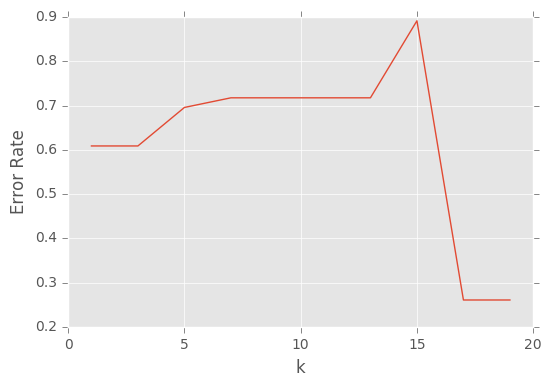

In [421]:
plt.plot(range(1,k_max + 1,2),err_list)
plt.xlabel('k')
plt.ylabel('Error Rate')

In [411]:
bigramitize = lambda text: [a + ' ' + b for a,b in nltk.bigrams(lemmatize(text))]

In [412]:
vectorizer = TfidfVectorizer(tokenizer=bigramitize,stop_words="english",smooth_idf=True,norm=None)
bitfs = vectorizer.fit_transform(fids)

In [424]:
k_max = 20
nbrs = NearestNeighbors(n_neighbors=k_max).fit(bitfs)
err_list = []

for k in xrange(1,k_max+1,2):
    neighmat = nbrs.kneighbors_graph(n_neighbors=k)
    pred_lab = (neighmat.dot(reu_label) > k/2.)*1 
    err =  np.mean(pred_lab != reu_label)
    err_list.append(err)

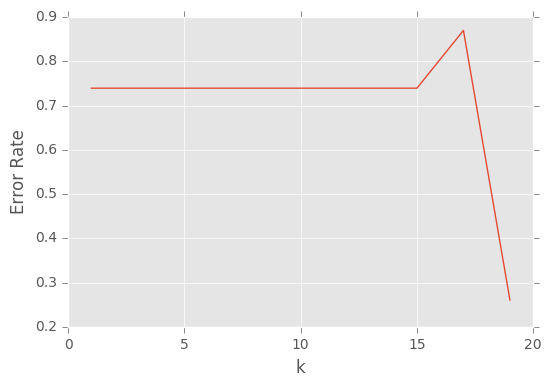

In [425]:
plt.plot(range(1,k_max + 1,2),err_list)
plt.xlabel('k')
plt.ylabel('Error Rate')